In [0]:
from google.colab import drive
import os

drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [0]:
import time
import pandas as pd
import numpy as np

# loading bar
# fix issue with tqdm and colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
from tqdm import tqdm_notebook as tqdm

  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47867 sha256=686dc2cd874b44734bcc3bf881967a445a50aa5933273c4634c555941a24d2cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-_7x7pad9/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
iterations = 100

for i in tqdm(range(iterations)):
    time.sleep(0.1)

/usr/local/lib/python3.6/dist-packages/tqdm/_tqdm_notebook.py:88: TqdmExperimentalWarning: Detect Google Colab 0.0.1a2 and thus load dummy ipywidgets package. Note that UI is different from that in Jupyter. See https://github.com/tqdm/tqdm/pull/640
  " See https://github.com/tqdm/tqdm/pull/640".format(colab.__version__), TqdmExperimentalWarning)


In [0]:
root_path = 'gdrive/My Drive/CA684_Assignment/'

In [0]:
os.chdir('gdrive/My Drive/CA684_Assignment/')

In [0]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1UWIdExqb5P94RLqkaiODcwFC2v7g3lB2/CA684_Assignment


In [0]:
!ls

Additional_Resources  Complete_Sources	Test-set
Assignment_Overview   Dev-set		Tutorials


In [0]:

ground_truth_file = 'Dev-set/Ground-truth/ground-truth.csv'


In [0]:
ground_truth_file = 'Dev-set/Ground-truth/ground-truth.csv'
ground_truth = pd.read_csv(ground_truth_file)
ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [0]:
ground_truth.describe()

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.860243,36.291500,0.778942,12.764667
std,0.080655,8.356285,0.144692,3.544815
min,0.388000,30.000000,0.000000,9.000000
25%,0.811000,33.000000,0.700000,10.000000
50%,0.867000,34.000000,0.800000,12.000000
75%,0.923000,34.000000,0.900000,14.000000
max,0.989000,100.000000,1.000000,40.000000


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-7436e384f0d3>", line 5, in <module>
    plt.xlabel('memorability')
AttributeError: module 'plotly' has no attribute 'xlabel'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.6/dist-packa

AttributeError: ignored

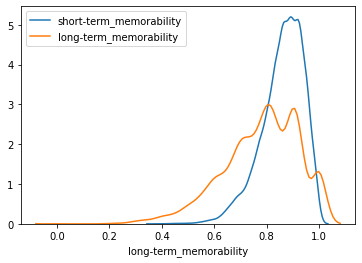

In [0]:
import seaborn as sns
import plotly as plt
for label in ['short-term_memorability', 'long-term_memorability']:
  sns.distplot(ground_truth[label], hist=False, label=label)
plt.xlabel('memorability')
plt.title('memorability density plot')

None

Examine Videos

In [0]:
# video captions
video_captions = list(open('Dev-set/Captions/dev-set_video-captions.txt', 'r'))
video_captions = [i.split('\t') for i in video_captions]
video_captions = [[a, b.strip()] for a, b in video_captions]
video_captions = pd.DataFrame(video_captions, columns=['video', 'caption'])
video_captions.head(10)

,video,caption
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot
5,video12.webm,passing-by-older-man-reading
6,video13.webm,christmas-village-and-national-christmas-tree
7,video16.webm,unhappy-friends-looking-for-something-interest...
8,video17.webm,hoover-dam-tourists-traffic
9,video18.webm,happy-girl-stretching-and-relaxing-on-the-station


*************************
*************************
IMPORTING!!!
*************************
*************************

In [0]:
import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import glob
import nltk

********************************
********************************
LOADING FEATURES
********************************
********************************

In [0]:
#Function to load C3D features
def load_c3d(captions, c3dPath):
    files = list(captions["video"].values)
    c3dfeatures = []
    for file in files:
        file = c3dPath+file[:-4]+'txt'
        c3dfeatures.append(np.loadtxt(file))
    #print(type(c3dfeatures))
    return c3dfeatures


In [0]:
#Function to load HMP features
def load_hmp(captions, hmp_path):
    files = list(captions["video"].values)
    hmp_features = []
    for file in files:
        file = hmp_path+file[:-4]+'txt'
        with open(file) as f:
            for line in f:
                pairs=line.split()
                HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
                HMP = np.zeros(6075)
            for idx in HMP_temp.keys():
                HMP[idx-1] = HMP_temp[idx]
            hmp_features.append(HMP)
    return hmp_features

In [0]:
#Function to load the captions into dataframes
def load_captions(filename):
    video_name = []
    captions = []
    dataframe = pd.DataFrame()
    with open(filename) as file:
        for line in file:
            pair = line.split() #each line in the text file contains to words so, this code will split them into two words
            video_name.append(pair[0]) #first word will be assigned as video name
            captions.append(pair[1]) #second word will be assigned as caption
        dataframe['video']=video_name #setting these two as column names of dataframe
        dataframe['caption']=captions
    return dataframe

In [0]:
#Function to calculate Spearman coefficient scores
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

In [0]:
#load the ground truth dataset
csv_path ='Dev-set/Ground-truth/ground-truth.csv'
dataset = pd.read_csv(csv_path)

In [0]:
#load captions
#captions_pathtest ='Test-set/Captions_test/test-set-1_video-captions.txt'
#captionstest = load_captions(captions_pathtest)

#load captions
captions_path ='Dev-set/Captions/dev-set_video-captions.txt'
captions = load_captions(captions_path)

In [0]:
#load captions
#captions_pathtest ='Dev-set/Captions/dev-set_video-captions.txt'
#dev_captions = load_captions(captions_pathtest)

In [0]:
#load C3D features
c3dPath = './Dev-set/C3D/'
c3dfeatures = load_c3d(captions,c3dPath)

In [0]:
#load HMP features
hmp_path = './Dev-set/HMP/'
hmp_features = load_hmp(captions,hmp_path)

In [0]:
dataset.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [0]:
captions.head()

,video,caption
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot


In [0]:
print(f'Ground Truth : {dataset.shape}')
print(f'Dev Captions : {captions.shape}')
print(f'C3D          : ({len(c3dfeatures)})')
print(f'HMP          : ({len(hmp_features)})')

Ground Truth : (6000, 5)
Dev Captions : (6000, 2)
C3D          : (6000)
HMP          : (6000)


********************************
********************************
Data Preprocessing
********************************
********************************

USING COUNTVECTORIZER ON CAPTION FEATURE
********************************
********************************

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:

#loading the nltk stopwords of English
stopwords = nltk.corpus.stopwords.words('english')
print(f'Length of Stopwords: {len(stopwords)}')

Length of Stopwords: 179


********************************
********************************
CLEANING DEVELOPMENT SET CAPTIONS
********************************
********************************

In [0]:
!pip install -q pyprind

In [0]:
!pip install PyPrind
#Removing punctuations and stop words from captions
# setup prograss tracker
#pbar = pyprind.ProgBar(len(captions['caption']), title='Counting word occurrences')
for i, cap in enumerate(captions['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    #removing stopwords
    rmv_stopwords= ' '.join([word for word in text.split() if word not in stopwords])
    captions.loc[i,'caption'] = rmv_stopwords #updating the original captions 
    #pbar.update()

In [0]:
captions.head()

,video,caption
0,video3.webm,blonde woman massaged tilt
1,video4.webm,roulette table spinning ball closeup shot
2,video6.webm,khr gangsters
3,video8.webm,medical helicopter hovers airport
4,video10.webm,couple relaxing picnic crane shot


In [0]:

#implementing bag of words for the combined captions
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",max_features=3112) 
captions_bag = vectorizer.fit_transform(captions.caption).toarray()
type(captions_bag)

numpy.ndarray

In [0]:
captions_bag.shape

(6000, 3112)

********************************
********************************
APPLYING RNN ON CAPTIONS
********************************
********************************

In [0]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
captions_pathtest ='Test-set/Captions_test/test-set-1_video-captions.txt'
captionstest = load_captions(captions_pathtest)

********************************
********************************
TEXT MAPPING
********************************
********************************

In [0]:
counts = Counter()
counts.update(text.split())
len_token = len(counts) # create length of token
tokenizer = Tokenizer(num_words=len_token) # use tokenizer
#print(len_token)

In [0]:
tokenizer.fit_on_texts(list(captionstest.caption.values))

In [0]:
one_hot_res = tokenizer.texts_to_matrix(list(captions.caption.values),mode='binary')

In [0]:
one_hot_res.shape

(6000, 10)

In [0]:
# For RNN we will need to use sequence embedding instead of one hot encoding
## Sequence Encoding of the text
sequences = tokenizer.texts_to_sequences(list(captions.caption.values))

In [0]:
## set max length of all dimensions to 50
max_length=50
X_seq = np.zeros((len(sequences),max_length))
for i in range(len(sequences)):
    n = len(sequences[i])
    if n==0:
        print(i)
    else:
        X_seq[i,-n:] = sequences[i]
X_seq.shape

1
2
3
4
5
6
7
8
9
10
11
12
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
32
33
34
35
36
37
38
39
40
41
43
44
45
46
48
50
51
52
53
55
57
58
59
61
62
63
64
65
69
71
72
73
74
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
93
95
96
97
98
99
100
101
102
103
104
105
107
108
109
110
111
112
113
114
115
117
119
121
122
124
125
126
127
128
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
149
150
151
153
154
155
156
157
159
160
161
163
164
165
166
168
169
170
171
172
173
174
176
178
179
180
181
182
183
184
185
187
189
191
192
193
194
195
197
198
200
201
202
203
204
206
208
209
210
211
212
213
214
215
216
218
219
220
221
222
223
224
225
226
227
228
230
231
232
233
234
237
238
239
240
241
243
244
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
263
265
266
267
268
269
270
271
272
275
276
277
278
279
280
284
285
288
289
290
291
292
293
294
295
298
299
302
303
304
306
307
308
309
310
311
314
316
317
318
320
321
322
323
325
326
327
329
330
331
332
333
336
337
338
33

(6000, 50)

In [0]:
from keras import Sequential
from keras import Sequential
from keras import layers
from keras import regularizers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning:

Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=5191, output_dim=20, input_length=50, embeddings_initializer="uniform")`

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0492 - accuracy: 0.6360 - val_loss: 0.0287 - val_accuracy: 0.7100
Epoch 2/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0284 - accuracy: 0.6702 - val_loss: 0.0206 - val_accuracy: 0.7100
Epoch 3/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0226 - accuracy: 0.6783 - val_loss: 0.0184 - val_accuracy: 0.7100
Epoch 4/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0199 - accuracy: 0.6842 - val_loss: 0.0160 - val_accuracy: 0.7100
Epoch 5/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0186 - accuracy: 0.6844 - val_loss: 0.0157 - val_accuracy: 0.7100
Epoch 6/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0176 - accuracy: 0.6971 - val_loss: 0.0148 - val_accuracy: 0.7100
Epoch 7/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.017

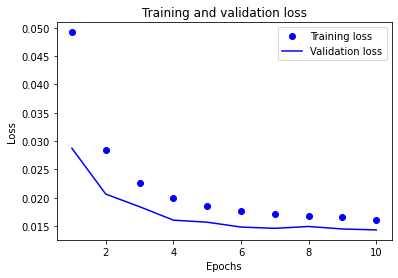

In [0]:
## sequences will be our X variable
## predictor will be our Y variable
predictor = dataset[['short-term_memorability','long-term_memorability']].values
Y = predictor
X = X_seq
## Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


## Recurrent Neural Network Model 
## All hyperparameters are selected using GridSearch and Trial & Error Approach

model=Sequential() # Create Sequential NN model

## add Embedding layer for RNN to map our data into a format suitable for LSTM layer
model.add(layers.Embedding(input_dim=5191, output_dim=20, input_length=50, init='uniform'))

## add LSTM layer for some hidden layer and memory into the network
model.add(layers.LSTM(150, activation='selu', recurrent_initializer='uniform', kernel_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))

## layer of 30 neurons to map down from 150 hidden neurons with ridge regularizer
model.add(layers.Dense(30, activation='selu', kernel_regularizer=regularizers.l2(0.001)))

## Dropout layer
model.add(layers.Dropout(0.6))

## Output layer of 2 neurons for each score with sigmoid activation 
model.add(layers.Dense(2, activation='sigmoid'))

## Compile the model 
# Optimizer Adamax
model.compile(optimizer='adamax',loss='mse',metrics=['accuracy'])


## Training the model 
# Number of epochs also comes from Gridsearch
history = model.fit(X_train,Y_train,epochs=10, validation_data=(X_test,Y_test))

# visualizing the model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plt.figure()
#acc = history.history['acc']
#val_acc = history.history['val_acc']
#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Acc')
#plt.legend()
#plt.show()


In [0]:
predictions = model.predict(X_test)
predictions.shape

(1200, 2)

In [0]:
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.167
The Spearman's correlation coefficient is: 0.076


*************************************
*************************************
#COMBINING CAPTIONS AND C3D#
*************************************
*************************************

In [0]:

captions_c3d = (captions_bag.tolist())
counter = 0
for item in range(6000):
    captions_c3d[counter] = np.append(captions_c3d[counter],c3dfeatures[counter],axis=0)
    counter = counter+1

In [0]:

len(captions_c3d[0])

3213

In [0]:
len(captions_c3d)

6000

*************************************
*************************************
#Combining Captions, C3D & HMP#
*************************************
*************************************

In [0]:
captions_c3d_hmp = captions_c3d
counter = 0
for item in range(6000):
    captions_c3d_hmp[counter] = np.append(captions_c3d_hmp[counter],hmp_features[counter],axis=0)
    counter = counter+1

In [0]:
len(captions_c3d_hmp[0])

9288

In [0]:
len(captions_c3d_hmp)

6000

**Now we have the following features**



*   Captions in: captions_bag
*   C3D in: c3dfeatures
*   HMP in: hmp_features
*   Captions and C3D:  captions_c3d
*   Captions, C3D and HMP in: captions_c3d_hmp





**************************************
**************************************

#EXPERIMEMTS WITH DIFFERENT MODELS AND FEATURES/COMBINATIONS#

**************************************
**************************************

*************************************
**RANDOM FOREST WITH CAPTIONS**

In [0]:
X = captions_bag
y = dataset[['short-term_memorability','long-term_memorability']].values

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 3112)
X_test   (1200, 3112)
Y_train  (4800, 2)
Y_test   (1200, 2)


In [0]:
from sklearn.ensemble import RandomForestRegressor
captions_rf = RandomForestRegressor(n_estimators=100,random_state=45)

In [0]:

captions_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [0]:
captions_pred = captions_rf.predict(X_test)

In [0]:
Get_score(captions_pred, y_test)

The Spearman's correlation coefficient is: 0.409
The Spearman's correlation coefficient is: 0.176


****************************
**SVR with Captions**

In [0]:
svr_X = captions_bag
svr_y_short = dataset[['short-term_memorability']].values
svr_y_long = dataset[['long-term_memorability']].values

In [0]:

# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(svr_X,svr_y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(svr_X,svr_y_long,test_size=0.2,random_state=40)

In [0]:

from sklearn.preprocessing import StandardScaler
short_X = StandardScaler()
short_y = StandardScaler()
short_X_train = short_X.fit_transform(short_X_train)
short_y_train = short_y.fit_transform(short_y_train)
long_X = StandardScaler()
long_y = StandardScaler()
long_X_train = long_X.fit_transform(long_X_train)
long_y_train = long_y.fit_transform(long_y_train)

In [0]:
from sklearn.svm import SVR
short_regressor = SVR(kernel = 'rbf')
long_regressor = SVR(kernel = 'rbf')
short_regressor.fit(short_X_train, short_y_train)
long_regressor.fit(long_X_train,long_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
short_pred = short_regressor.predict(short_X_test)
short_pred = short_y.inverse_transform(short_pred)
long_pred = long_regressor.predict(long_X_test)
long_pred = long_y.inverse_transform(long_pred)

In [0]:
Get_score(short_pred, short_y_test)
Get_score(long_pred, long_y_test)

The Spearman's correlation coefficient is: 0.338
The Spearman's correlation coefficient is: 0.170


***********************************************
**Random Forest with C3D**

In [0]:
X = c3dfeatures
y = dataset[['short-term_memorability','long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=20,random_state=42,verbose=2)

In [0]:
rf_regressor.fit(X_train,y_train)

building tree 1 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.4s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=2, warm_start=False)

In [0]:
rf_pred1 = rf_regressor.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [0]:

Get_score(rf_pred1, y_test)

The Spearman's correlation coefficient is: 0.266
The Spearman's correlation coefficient is: 0.122


*****************************************
**SVR with C3D**

In [0]:
svr_X = c3dfeatures
svr_y_short = dataset[['short-term_memorability']].values
svr_y_long = dataset[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(svr_X,svr_y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(svr_X,svr_y_long,test_size=0.2,random_state=40)

In [0]:
from sklearn.preprocessing import StandardScaler
short_X = StandardScaler()
short_y = StandardScaler()
short_X_train = short_X.fit_transform(short_X_train)
short_y_train = short_y.fit_transform(short_y_train)
long_X = StandardScaler()
long_y = StandardScaler()
long_X_train = long_X.fit_transform(long_X_train)
long_y_train = long_y.fit_transform(long_y_train)

In [0]:
from sklearn.svm import SVR
short_regressor = SVR(kernel = 'rbf')
long_regressor = SVR(kernel = 'rbf')
short_regressor.fit(short_X_train, short_y_train)
long_regressor.fit(long_X_train,long_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
short_pred = short_regressor.predict(short_X_test)
short_pred = short_y.inverse_transform(short_pred)
long_pred = long_regressor.predict(long_X_test)
long_pred = long_y.inverse_transform(long_pred)

In [0]:
Get_score(short_pred, short_y_test)
Get_score(long_pred, long_y_test)

The Spearman's correlation coefficient is: 0.242
The Spearman's correlation coefficient is: 0.107


**********************************************


**Random Forest with Captions and C3D**

In [0]:
X = captions_c3d
y = dataset[['short-term_memorability','long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=50,random_state=45,verbose=2)

In [0]:
rf_regressor.fit(X_train,y_train)

building tree 1 of 50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.7min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=45, verbose=2, warm_start=False)

In [0]:
rf_pred2 = rf_regressor.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [0]:
Get_score(rf_pred2, y_test)

The Spearman's correlation coefficient is: 0.300
The Spearman's correlation coefficient is: 0.120


*******************************************
**SVR with Captions and C3D**

In [0]:

svr_X = captions_c3d
svr_y_short = dataset[['short-term_memorability']].values
svr_y_long = dataset[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(svr_X,svr_y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(svr_X,svr_y_long,test_size=0.2,random_state=40)

In [0]:
from sklearn.preprocessing import StandardScaler
short_X = StandardScaler()
short_y = StandardScaler()
short_X_train = short_X.fit_transform(short_X_train)
short_y_train = short_y.fit_transform(short_y_train)
long_X = StandardScaler()
long_y = StandardScaler()
long_X_train = long_X.fit_transform(long_X_train)
long_y_train = long_y.fit_transform(long_y_train)

In [0]:
from sklearn.svm import SVR
short_regressor = SVR(kernel = 'rbf')
long_regressor = SVR(kernel = 'rbf')
short_regressor.fit(short_X_train, short_y_train)
long_regressor.fit(long_X_train,long_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
short_pred = short_regressor.predict(short_X_test)
short_pred = short_y.inverse_transform(short_pred)
long_pred = long_regressor.predict(long_X_test)
long_pred = long_y.inverse_transform(long_pred)

In [0]:
Get_score(short_pred, short_y_test)
Get_score(long_pred, long_y_test)

The Spearman's correlation coefficient is: 0.355
The Spearman's correlation coefficient is: 0.179


**********************************************
**Random Forest with Captions, C3D and HMP**

In [0]:

X = captions_c3d_hmp
y = dataset[['short-term_memorability','long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100,random_state=45,verbose=2)

In [0]:
rf_regressor.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 29.6min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=45, verbose=2, warm_start=False)

In [0]:
rf_pred3 = rf_regressor.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [0]:

Get_score(rf_pred3, y_test)

The Spearman's correlation coefficient is: 0.322
The Spearman's correlation coefficient is: 0.145


************************************
**SVR with Captions, C3D and HMP**

In [0]:
svr_X = captions_c3d_hmp
svr_y_short = dataset[['short-term_memorability']].values
svr_y_long = dataset[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(svr_X,svr_y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(svr_X,svr_y_long,test_size=0.2,random_state=40)

In [0]:
from sklearn.preprocessing import StandardScaler
short_X = StandardScaler()
short_y = StandardScaler()
short_X_train = short_X.fit_transform(short_X_train)
short_y_train = short_y.fit_transform(short_y_train)
long_X = StandardScaler()
long_y = StandardScaler()
long_X_train = long_X.fit_transform(long_X_train)
long_y_train = long_y.fit_transform(long_y_train)

In [0]:
from sklearn.svm import SVR
short_regressor = SVR(kernel = 'rbf')
long_regressor = SVR(kernel = 'rbf')
short_regressor.fit(short_X_train, short_y_train)
long_regressor.fit(long_X_train,long_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
short_pred = short_regressor.predict(short_X_test)
short_pred = short_y.inverse_transform(short_pred)
long_pred = long_regressor.predict(long_X_test)
long_pred = long_y.inverse_transform(long_pred)

In [0]:
Get_score(short_pred, short_y_test)
Get_score(long_pred, long_y_test)

The Spearman's correlation coefficient is: 0.355
The Spearman's correlation coefficient is: 0.179


******************************
******************************
#SELECTING THE BEST MODEL WITH FEATURES#
******************************
******************************

RANDOM FOREST WITH CAPTION HAS GIVEN US THE BEST RESULTS

In [0]:
Get_score(captions_pred, y_test)

The Spearman's correlation coefficient is: 0.409
The Spearman's correlation coefficient is: 0.176


******************************
******************************
#PREDICTING THE TEST RESULTS#
******************************
******************************

NOW WE WILL BE USING THE ENTIRE 6000 DEVELOPMENT DATASET TO TRAIN OUR MODEL AND APPLY THE RESULTS ON THE 2000 DEVELOPMENT SET FOR RANDOM FOREST MODEL WITH CAPTIONS

In [0]:
X = captions_bag
y = dataset[['short-term_memorability','long-term_memorability']].values

In [0]:
print(f'X: ({len(X)})')
print(f'y:{y.shape}')

X: (6000)
y:(6000, 2)


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100,random_state=45)

In [0]:
rf_regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

IMPORTING TEST DATASET AND CAPTIONS

In [0]:
#importing test Dataset
csv_path ='Test-set/Ground-truth_test/ground_truth_template.csv'
test_dataset = pd.read_csv(csv_path)



In [0]:

#load the test set captions
test_captions_path ='Test-set/Captions_test/test-set-1_video-captions.txt'
test_captions = load_captions(test_captions_path)

In [0]:
test_dataset.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,NaN,33,NaN,12
1,7495,NaN,34,NaN,10
2,7496,NaN,32,NaN,13
3,7497,NaN,33,NaN,10
4,7498,NaN,33,NaN,10


WE NEED TO FILL THE VALUES OF OUR PREDICTION HERE

In [0]:
test_captions.head()

,video,caption
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...
4,video7498.webm,slow-motion-of-photographer-in-national-park


In [0]:
#printing the dimensions of test-set dataset and features
print(f'Test-Dataset : {test_dataset.shape}')
print(f'Test-Captions: {test_captions.shape}')

Test-Dataset : (2000, 5)
Test-Captions: (2000, 2)


In [0]:
for i, cap in enumerate(test_captions['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    #removing stopwords
    rmv_stopwords= ' '.join([word for word in text.split() if word not in stopwords])
    test_captions.loc[i,'caption'] = rmv_stopwords #updating the original captions 


In [0]:

test_captions.head(1410)

,video,caption
0,video7494.webm,green jeep struggling drive huge rocks
1,video7495.webm,hiking woman tourist walking forward mountains...
2,video7496.webm,close african american doctors hands using sph...
3,video7497.webm,slow motion man using treadmill gym regular ph...
4,video7498.webm,slow motion photographer national park
...,...,...
1405,video9283.webm,man performing martial arts use nunchaku
1406,video9284.webm,back close upof man dark room playing racing g...
1407,video9288.webm,point view little girl lying grass laughing gr...
1408,video9289.webm,cute little girl sitting kitchen table pouring...


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",max_features=3122) 
test_captions_bag = vectorizer.fit_transform(test_captions.caption).toarray()
type(test_captions_bag)

numpy.ndarray

In [0]:
#print(f'Testing Bag of words size     : {len(test_captions_bag)}')
#print(f'Development Bag of words size : {len(captions_bag)}')
print(f'Development Vocabulary Size   : {len(captions_bag[0])}')
print(f'Testing Vocabulary Size       : {len(test_captions_bag[0])}')

Development Vocabulary Size   : 3112
Testing Vocabulary Size       : 3112


**PREDICTING AND EXPORTING RESULTS**

In [0]:
test_pred = rf_regressor.predict(test_captions_bag)

In [0]:
pred = pd.DataFrame()

In [0]:
type(test_pred)

numpy.ndarray

In [0]:
pred['short-term'] = test_pred[:,0]

In [0]:
pred['long-term'] = test_pred[:,1]

In [0]:

pred.sort_values(by='short-term', ascending=False)


,short-term,long-term
926,0.953749,0.892380
1400,0.936548,0.949478
1299,0.934161,0.788914
1754,0.929084,0.917522
939,0.928873,0.882550
...,...,...
481,0.731869,0.774900
820,0.727445,0.685896
1835,0.709939,0.762564
1438,0.690135,0.571422


In [0]:
pred.head(10)

,short-term,long-term
0,0.854635,0.712699
1,0.898883,0.781500
2,0.841901,0.805625
3,0.915282,0.826990
4,0.866134,0.711727
5,0.829725,0.740506
6,0.829797,0.719513
7,0.849537,0.729653
8,0.778917,0.790459
9,0.866541,0.675180


In [0]:
pred.describe()

,short-term,long-term
count,2000.000000,2000.000000
mean,0.848028,0.751163
std,0.034564,0.067863
min,0.687093,0.397318
25%,0.830368,0.721224
50%,0.849698,0.757218
75%,0.871004,0.792872
max,0.953749,0.949478


EXPORTING CSV

In [0]:

from google.colab import drive
import os
drive.mount('/content/gdrive/',force_remount=True)
pred.to_csv('content/gdrive/My Drive/output2.csv')


In [0]:
!ls

In [0]:
pred.describe()

,short-term,long-term
count,2000.000000,2000.000000
mean,0.848028,0.751163
std,0.034564,0.067863
min,0.687093,0.397318
25%,0.830368,0.721224
50%,0.849698,0.757218
75%,0.871004,0.792872
max,0.953749,0.949478


*******************************
**ENSEMBLE MODEL**
*******************************

RANDOM FOREST WITH C3D AND RANDOM FOREST WITH CAPTIONS WE OBTAIN A BETTER RESULT

In [0]:
finalpred2 = (0.5*captions_pred + 0.2*rf_pred1 + 0.2*rf_pred2 + 0.1*rf_pred3)
Get_score(finalpred2, y_test)

The Spearman's correlation coefficient is: 0.435
The Spearman's correlation coefficient is: 0.201
